<a href="https://colab.research.google.com/github/VR952004/DataAnalysisProjects/blob/main/SleepHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

In [2]:
df=pd.read_csv("/content/drive/MyDrive/csv files/Sleep_health_and_lifestyle_dataset.csv")

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
#we could convert the datatype of occupation, BMI Category and Sleep Disorder columns to category so that it can bee used in the ML model
df["Occupation"]=df["Occupation"].astype("category")
df["BMI Category"]=df["BMI Category"].astype("category")
df["Sleep Disorder"]=df["Sleep Disorder"].astype("category")

In [6]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [7]:
#This is used to convert the categorical data into numbers representing it. This is done because our computers are able to process numbers faster than words.
df["Gender"]=(df["Gender"]=="Male").astype(int)

In [8]:
df["Gender"].unique()

array([1, 0])

In [9]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
'''
The unique function is used to show all the unique values in that dataset, here we have selected only the column of BMI category and find all the unique values in it.
Since "Normal" and "Normal Weight" have the same meaning, we will change the value to "Normal"
'''
df["BMI Category"].unique()

['Overweight', 'Normal', 'Obese', 'Normal Weight']
Categories (4, object): ['Normal', 'Normal Weight', 'Obese', 'Overweight']

In [11]:
'''
The replace function works as follows:
The first parameter is the value that is to be replaced. While the second parameter is the value that must replace the current value.
'''
df["BMI Category"]=df["BMI Category"].replace("Normal Weight","Normal")

In [12]:
df["BMI Category"].unique()

['Overweight', 'Normal', 'Obese']
Categories (3, object): ['Normal', 'Obese', 'Overweight']

In [13]:
#To split the systolic and diastolic values of the blood pressure.

sys_dia=df["Blood Pressure"].str.split("/",expand=True)   #This is done to split the string whereever "/" is present in the string. expand=True will make two separate tuples.

sys_dia=sys_dia.astype(int)   #This is used to change the data type of from string to int.

bpind=df.columns.get_loc("Blood Pressure")    #This finds the location of the "Blood Pressure" column in the data frame.

df.insert(bpind+1, "Systole", sys_dia[0])   #This inserts a new column with the name "Systole" with the value of the 0th row of the tuple sys_dia.
df.insert(bpind+2, "Diastole", sys_dia[1])  #This inserts a new column with the name "Diastole" with the value of the 1st row of the tuple sys_dia.

df=df.drop(columns=["Blood Pressure"])    #This is to drop the blood pressure column from the data frame since it isn't required anymore.

In [14]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Systole,Diastole,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,Software Engineer,6.1,6,42,6,Overweight,126,83,77,4200,None
1,2,1,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,None
2,3,1,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,None
3,4,1,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
4,5,1,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea


In [15]:
df["Heart Rate"].describe()

count    374.000000
mean      70.165775
std        4.135676
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       86.000000
Name: Heart Rate, dtype: float64

In [16]:
iqr=72-68

ul=72+1.5*iqr
ll=68-1.5*iqr

iqr,ll,ul

(4, 62.0, 78.0)

<Axes: ylabel='Heart Rate'>

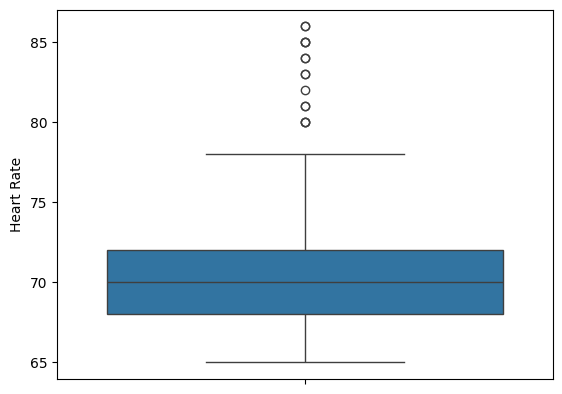

In [17]:
sns.boxplot(df["Heart Rate"])

In [18]:
#capping the data, so as to not delete the data from the pre-existing data. We only need to cap on the upper limit since there are no outliers on the lower end.

df.loc[df["Heart Rate"] > 78, "Heart Rate"] = ul

<Axes: ylabel='Heart Rate'>

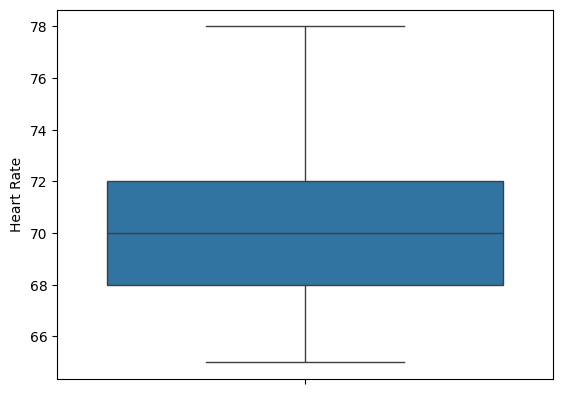

In [19]:
sns.boxplot(df["Heart Rate"])

Let us understand the different sleep disorders:


1.   **No Disorder :** This means that the person has no sleeping disorder and they are getting an adequate amount of sleep in terms of the hours and the sleep quality.
2.   **Sleep Apnea :** This is a potentially serious sleep disorder in which the breathing repeatedly starts and stops throughout the sleep duration. The main risk factors for this to occur is age and obesity.This majorly occurs in males.
3.   **Insomnia :** This is the disorder in which there is a persistent problem of falling and staying asleep. This is majorly caused due to poor sleeping habits, stress, anxiety and lack of excersize.



# Visualization of the Data

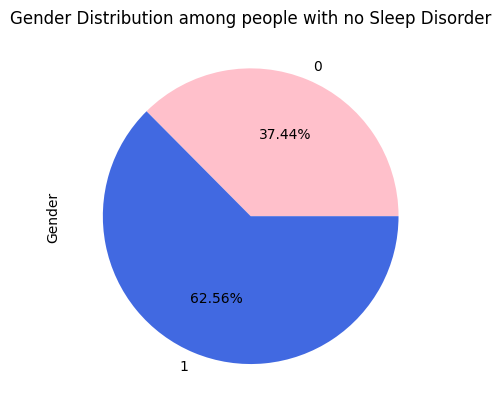

In [20]:
vis1=df[df["Sleep Disorder"]=="None"]["Gender"].value_counts(ascending=True)
vis1.plot(kind="pie",title="Gender Distribution among people with no Sleep Disorder", colors=["pink","royalblue"], autopct="%2.2f%%")
plt.show()

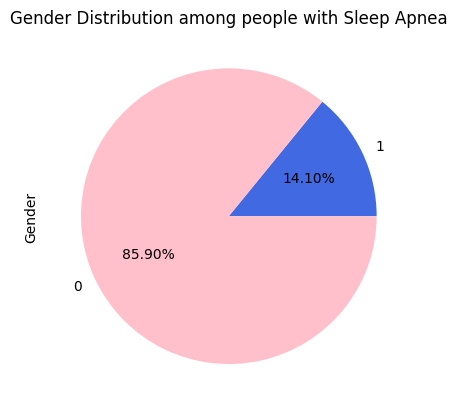

In [21]:
vis2=df[df["Sleep Disorder"]=="Sleep Apnea"]["Gender"].value_counts(ascending=True)
vis2.plot(kind="pie",title="Gender Distribution among people with Sleep Apnea", colors=["royalblue","pink"], autopct="%2.2f%%")
plt.show()

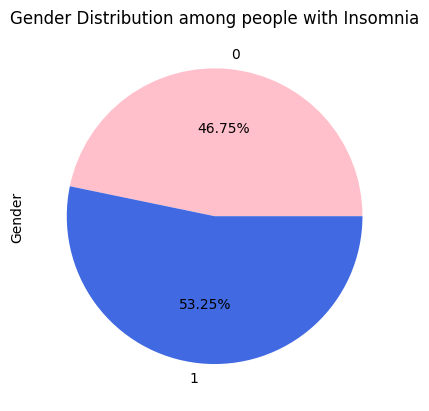

In [22]:
vis3=df[df["Sleep Disorder"]=="Insomnia"]["Gender"].value_counts(ascending=True)
vis3.plot(kind="pie",title="Gender Distribution among people with Insomnia", colors=["pink","royalblue"], autopct="%2.2f%%")
plt.show()

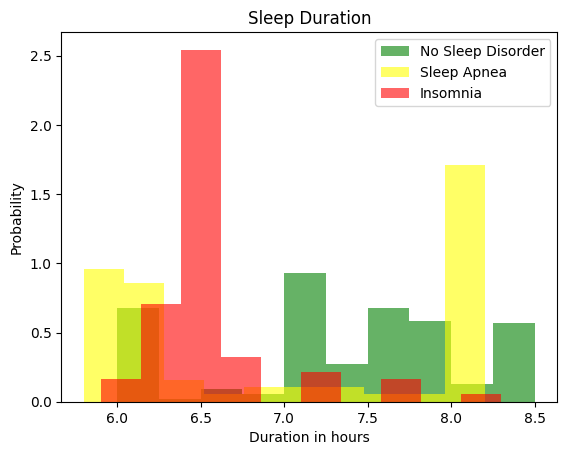

In [23]:
plt.hist(df[df["Sleep Disorder"]=="None"]["Sleep Duration"], color="Green", label="No Sleep Disorder", alpha=0.6, density=True)
plt.hist(df[df["Sleep Disorder"]=="Sleep Apnea"]["Sleep Duration"], color="Yellow", label="Sleep Apnea", alpha=0.6, density=True)
plt.hist(df[df["Sleep Disorder"]=="Insomnia"]["Sleep Duration"], color="Red", label="Insomnia", alpha=0.6, density=True)
plt.title("Sleep Duration")
plt.ylabel("Probability")
plt.xlabel("Duration in hours")
plt.legend()
plt.show()

From the above histograms based on the duration of sleep in hours, we can see the following based on the different disorders:



*   **No Sleep Disorder :** Majority of the people with no sleep disorder are able to sleep for more than 7 hours with some outliers where the duration is for 6 hours.
*   **Sleep Apnea :** There isn't a particular pattern among the people who have sleep apnea but we can see that majority of the people either sleep for around 6 hours or for 8 hours and some of them sleep for durations between 6 hours to 8 hours.
*   **Insomnia :** We can see a distinct pattern with the people having insomnia, that they sleep for a duration of 6 hours to 6.8 hours. Not many people with insomnia are able to sleep for a duration longer than 7 hours.



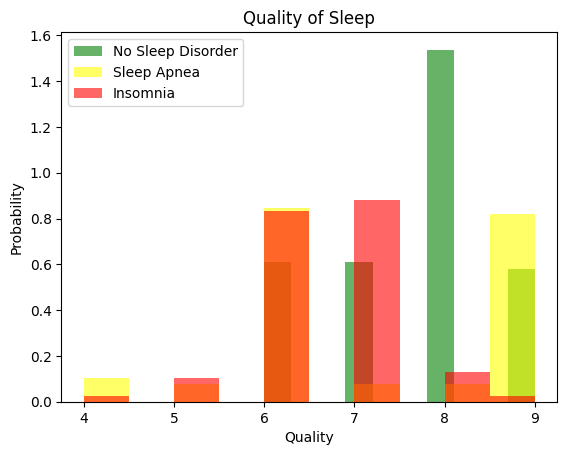

In [24]:
plt.hist(df[df["Sleep Disorder"]=="None"]["Quality of Sleep"], color="Green", label="No Sleep Disorder", alpha=0.6, density=True)
plt.hist(df[df["Sleep Disorder"]=="Sleep Apnea"]["Quality of Sleep"], color="Yellow", label="Sleep Apnea", alpha=0.6, density=True)
plt.hist(df[df["Sleep Disorder"]=="Insomnia"]["Quality of Sleep"], color="Red", label="Insomnia", alpha=0.6, density=True)
plt.title("Quality of Sleep")
plt.ylabel("Probability")
plt.xlabel("Quality")
plt.legend()
plt.show()

From the above histograms based on the quality of sleep, we can see the following based on the different disorders:



*   **No Sleep Disorder :** People with no sleep disorders is have a high sleep quality with majority of the people with rating their sleep to be 8/10. There are approxiamtely equal amounts of people who have rated their sleep to be 6,7,9. Thus, we can say that people with no sleep disorders have a great sleep quality.
*   **Sleep Apnea :** We can see that the majority of the people with sleep apnea rate 6/10 with an approxiamately equal amount of people who rate it to be 9/10, with certain outliers who rate it tp be between 6 and 9 and lesser than 6.Thus, we can say that people with sleep apnea get a decent quality of sleep.
*   **Insomnia :** We can see that the sleep quality of insomniacs is majorly 6 or 7 which is a decent quality of sleep. There are some exceptional cases where these insomniacs get either a great a quality of sleep or poor quality of sleep.This means they don't get a lot of sleep but whatever sleep they get has a dedcent quality.

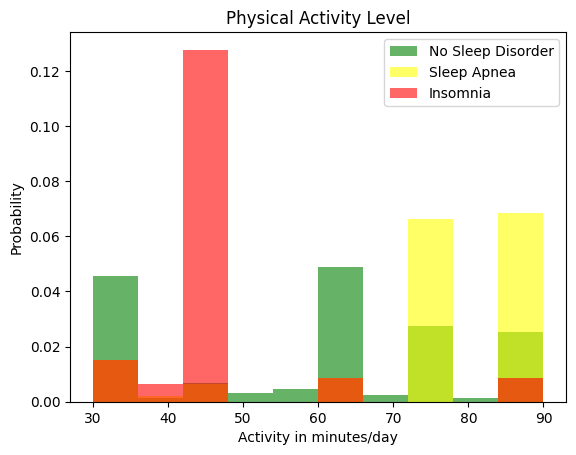

In [25]:
plt.hist(df[df["Sleep Disorder"]=="None"]["Physical Activity Level"], color="Green", label="No Sleep Disorder", alpha=0.6, density=True)
plt.hist(df[df["Sleep Disorder"]=="Sleep Apnea"]["Physical Activity Level"], color="Yellow", label="Sleep Apnea", alpha=0.6, density=True)
plt.hist(df[df["Sleep Disorder"]=="Insomnia"]["Physical Activity Level"], color="Red", label="Insomnia", alpha=0.6, density=True)
plt.title("Physical Activity Level")
plt.ylabel("Probability")
plt.xlabel("Activity in minutes/day")
plt.legend()
plt.show()

From the above histograms based on the physical activity in terms of minutes per day, we can see the following based on the different disorders:



*   **No Sleep Disorder :** We cannot exactly determine the pattern among the people who have no sleep disorders, since their physical activities is fairly spread out. but we can see that majority of these people either engage in activity for 30 mins/day or 60 mins/day. There is quite a substantial amount of these people who do physical activities between 75 mins/day to 90 mins/day.
*   **Sleep Apnea :** We see a distinct pattern that people suffering from sleep apnea participate in physical activity for long durations such as 80-90 mins/day. We can see this because it is medically recommended protective factor to mitigate sleep apnea.
*   **Insomnia :** We can see that the sleep quality of insomniacs is majorly 6 or 7 which is a decent quality of sleep. There are some exceptional cases where these insomniacs get either a great a quality of sleep or poor quality of sleep.This means they don't get a lot of sleep but whatever sleep they get has a decent quality.

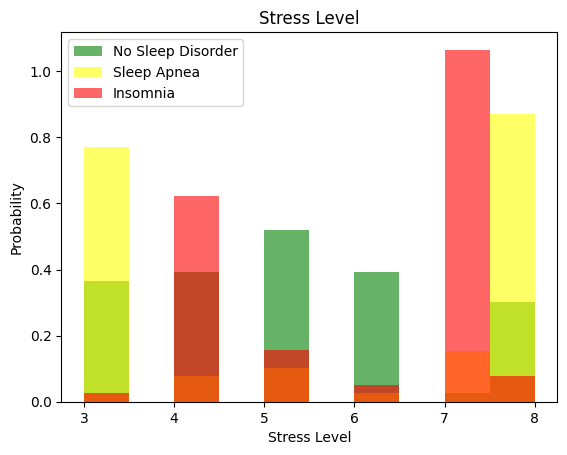

In [26]:
plt.hist(df[df["Sleep Disorder"]=="None"]["Stress Level"], color="Green", label="No Sleep Disorder", alpha=0.6, density=True)
plt.hist(df[df["Sleep Disorder"]=="Sleep Apnea"]["Stress Level"], color="Yellow", label="Sleep Apnea", alpha=0.6, density=True)
plt.hist(df[df["Sleep Disorder"]=="Insomnia"]["Stress Level"], color="Red", label="Insomnia", alpha=0.6, density=True)
plt.title("Stress Level")
plt.ylabel("Probability")
plt.xlabel("Stress Level")
plt.legend()
plt.show()

From the above histograms based on the stress levels, we can see the following based on the different disorders:



*   **No Sleep Disorder :** We can see the stress levels are pretty evenly distibuted throughout. But we can see that the people have an average stress level.Thus we can say that people with no sleep disorders have moderate levels of stress which do no affect their sleep.
*   **Sleep Apnea :** We see a distinct pattern that people suffering from sleep apnea participate in physical activity for long durations such as 80-90 mins/day. We can see this because it is medically recommended protective factor to mitigate sleep apnea.
*   **Insomnia :** As studies suggest and the above data

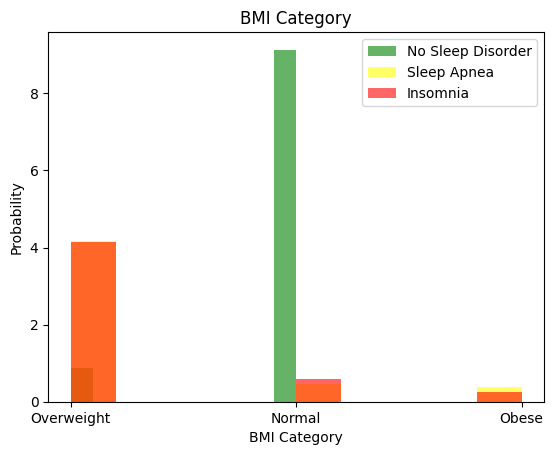

In [27]:
plt.hist(df[df["Sleep Disorder"]=="None"]["BMI Category"], color="Green", label="No Sleep Disorder", alpha=0.6, density=True)
plt.hist(df[df["Sleep Disorder"]=="Sleep Apnea"]["BMI Category"], color="Yellow", label="Sleep Apnea", alpha=0.6, density=True)
plt.hist(df[df["Sleep Disorder"]=="Insomnia"]["BMI Category"], color="Red", label="Insomnia", alpha=0.6, density=True)
plt.title("BMI Category")
plt.ylabel("Probability")
plt.xlabel("BMI Category")
plt.legend()
plt.show()

From the above histograms based on the BMI Category, we can see the following based on the different disorders:



*   **No Sleep Disorder :** We can see that majority of the people with no sleep disorders have a normal BMI category, this means that they are fit.
*   **Sleep Apnea :** We can see that sleep apnea is majorly faced by the people with overweight with some people even being obese and some being of normal BMI category.
*   **Insomnia :** Insomniacs show the similar pattern as the people who face sleep apnea. There are a slightly lesser number of obese insomniacs than obese sleep apnea patients.

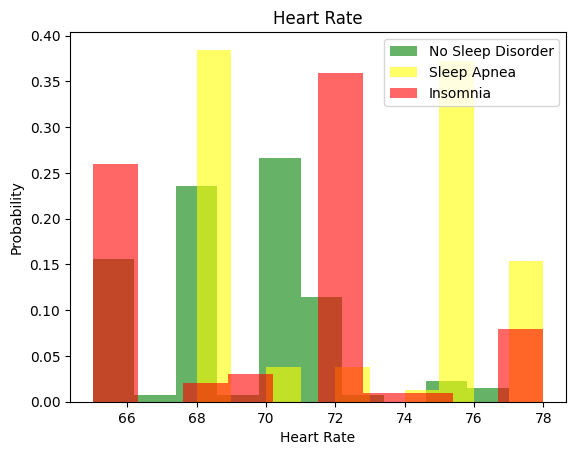

In [28]:
plt.hist(df[df["Sleep Disorder"]=="None"]["Heart Rate"], color="Green", label="No Sleep Disorder", alpha=0.6, density=True)
plt.hist(df[df["Sleep Disorder"]=="Sleep Apnea"]["Heart Rate"], color="Yellow", label="Sleep Apnea", alpha=0.6, density=True)
plt.hist(df[df["Sleep Disorder"]=="Insomnia"]["Heart Rate"], color="Red", label="Insomnia", alpha=0.6, density=True)
plt.title("Heart Rate")
plt.ylabel("Probability")
plt.xlabel("Heart Rate")
plt.legend()
plt.show()

From the above histograms based on the Heart Rate. We know that the normal heart rate in human is 72. We can see the following based on the different disorders:



*   **No Sleep Disorder :** We see that majority of the people with no sleep disorders have a pulse between 67 to 73, with a considerable number of people having a pulse of 65.
*   **Sleep Apnea :** We can see that people with sleep apnea majorly have higher heart rate than either of the categories of the people.
*   **Insomnia :** Insomniacs show the similar pattern as the people who face sleep apnea. There are a slightly lesser number of obese insomniacs than obese sleep apnea patients.

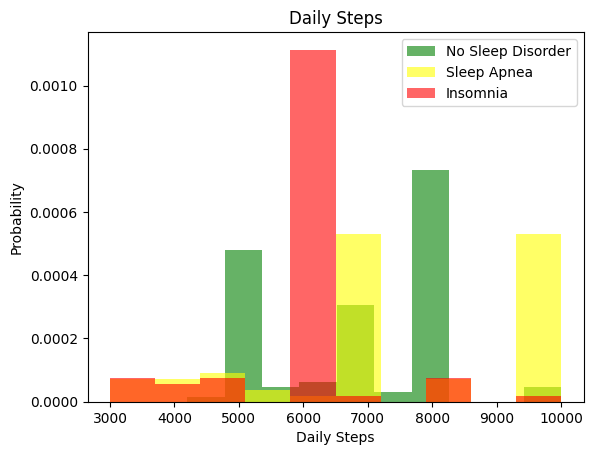

In [29]:
plt.hist(df[df["Sleep Disorder"]=="None"]["Daily Steps"], color="Green", label="No Sleep Disorder", alpha=0.6, density=True)
plt.hist(df[df["Sleep Disorder"]=="Sleep Apnea"]["Daily Steps"], color="Yellow", label="Sleep Apnea", alpha=0.6, density=True)
plt.hist(df[df["Sleep Disorder"]=="Insomnia"]["Daily Steps"], color="Red", label="Insomnia", alpha=0.6, density=True)
plt.title("Daily Steps")
plt.ylabel("Probability")
plt.xlabel("Daily Steps")
plt.legend()
plt.show()

# Setting Up a Machine Learning model

In [30]:
'''
First and foremost we must convert the Occupation to a numeric value so that it can be used in the ML operations.
To do so, we use label encoders which gives every unique value in a non-numeric column a numeric label.
'''
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
df['Occupation']=le1.fit_transform(df['Occupation'])

In [31]:
le2=LabelEncoder()
df['BMI Category']=le2.fit_transform(df['BMI Category'])

In [32]:
le3=LabelEncoder()
df['Sleep Disorder']=le3.fit_transform(df['Sleep Disorder'])

In [33]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Systole,Diastole,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,2,126,83,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,125,80,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,125,80,75,10000,1
3,4,1,28,6,5.9,4,30,8,1,140,90,78,3000,2
4,5,1,28,6,5.9,4,30,8,1,140,90,78,3000,2


In [34]:
df["Sleep Disorder"].unique()

array([1, 2, 0])

In [35]:
'''
The following is the meaning of the code written below in this cell:
np.split() : It is a numpy function used to split the dataframe, where the first parameter is the data frame that is the be split into the training, validation and testing parts.

df.sample(frac=1) : It is a pandas function that is used to randomize the order of the rows in the data set.Where sample() is a function used to randomly sample rows or fraction
of rows from the dataset.frac=1 is used as a parameter in the sample function so as to retunrn the randomly sampled rows in the dataframe. Since frac is set to be 1,
100% of the rows are returned.

The second parameter in the split funtion specifies how much is to be split, sp int(0.8*len(df)) means that split the first 80% of the rows in the dataframe for training,
then int(0.9*len(df)) means that from the 80% mark of the dataframe to the 90% mark of the dataframe must go for validation and the remaining must go for testing.

So to understand for this dataset, since the total number of rows are 374 we can say that:
-> Training set is from row number 1 to 299
-> Validation set is from row number 300 to 337
-> Testing set is from row number 338 to 374
'''

train,validate,test=np.split(df.sample(frac=1), [int(0.8*len(df)),int(0.9*len(df))])

In [36]:
print(len(train[train["Sleep Disorder"]==0]))
print(len(train[train["Sleep Disorder"]==1]))
print(len(train[train["Sleep Disorder"]==2]))

#We can see that the samples in the test set for sleep apnea and insomnia are substantially lesser than that of No sleep disorder, thus we will need to over sample the train set

58
174
67


In [37]:
def datasetSampler(dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values    #Splits the dataframe consisting of all the columns other than the output column that being sleep disorder in this case.
  y=dataframe[dataframe.columns[-1]].values   #Splits the dataframe into the result column

  if oversample:                      #This is used to over sample in case a certain result has lesser data points in the given dataset
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)

  data=np.hstack((x,np.reshape(y,(-1,1))))    #hstack() is used to stack the input columns and output column in a horizontal manner.
                                              #Also since x is 2 dimensional and y is single dimension we need to reshape the dimension of y for hstack() to work.

  return data,x,y

In [38]:
train,x_train,y_train=datasetSampler(train,True)
validate,validate_x,validate_y=datasetSampler(validate,False)
test,test_x,test_y=datasetSampler(test,False)

In [39]:
print(sum(y_train==0))
print(sum(y_train==1))
print(sum(y_train==2))

#We can see that the disparity in the number of data points for sleep apnea and insomnia was overcomed with the help of the sampler function

174
174
174


# **1)K-Nearest Neighbors**
This is a method of predicting the outcome of the input based on the outcomes of the nearest neighbors to the input. The number of neighbors that are to be used to predict the outcome is done with the value of "K". "K" can be any value based on the number of data points in the data set.This method is mainly used for binary classification.

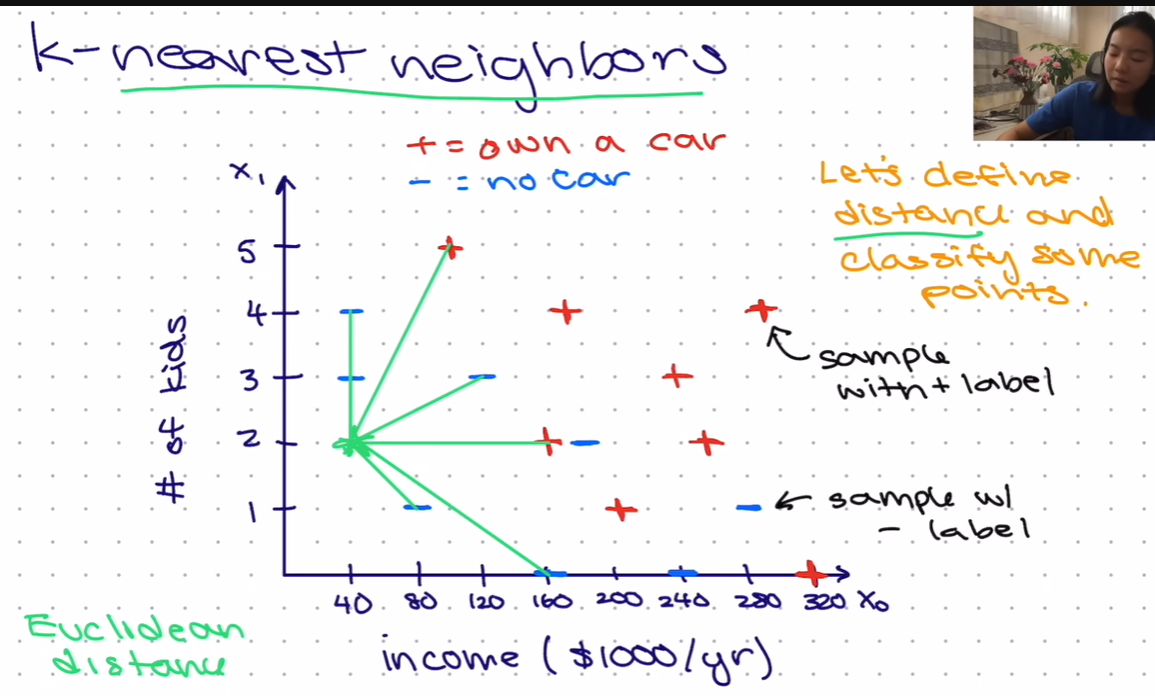

As seen in the above image, there are data points that show the number of children in the family and their annual earnings. We are also shown whether the family owns a car or not.So, this is a case of binary classification wherever we have to predict if the family will own a car or not on the basis of their annual income and number of children as well as the data of whether the near neighbors own a car or not. Also,we must notice that here only two parameters are taken into account namely "number of kids" and "annual family income", but we can extrapolate the same concept to more parameters.

In our data set of sleep disorders we cannot use this since there are three possible outcomes that can be reached. In this we can predict an outcome based on the majority of the neighboring outcomes to the input data point.



In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [41]:
knn_model=KNeighborsClassifier(n_neighbors=1)   #The parameter n_neighbor is used as the value of k that will be used to predict the outcome based on the number of nearest neighbors
knn_model.fit(x_train,y_train)    #The .fit() function is used to fit the training set in the pre-defined ML algorithm

KNeighborsClassifier(n_neighbors=1)

In [42]:
y_pred=knn_model.predict(test_x)    #We use the input columns from the test set to make predictions. The .predict() function is used to predict based on the test data set

In [43]:
print(classification_report(test_y,y_pred))   #Using classification reports we cross-checked our predicted output with the output that we already had.

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.90      0.90      0.90        21
           2       0.86      1.00      0.92         6

    accuracy                           0.89        38
   macro avg       0.89      0.91      0.89        38
weighted avg       0.90      0.89      0.89        38



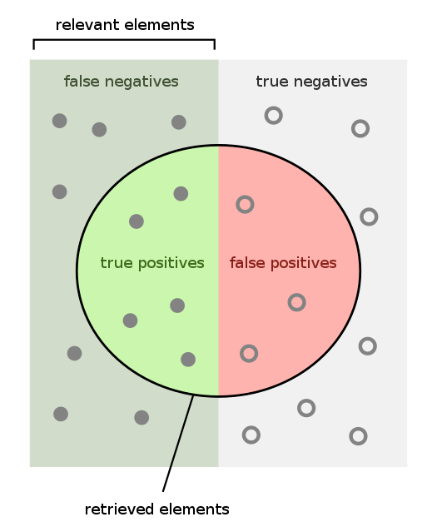

To understand what the classification report means we must understand what the different terms mean :

**1)True Positive :** These are the values that are actually positive and the considered to be positive.So, in summary they are correctly identified postive cases.

**2) False Positive :** These are values which are actually negative but are considered to be positive.So, in summary they are incorrectly identified postivie cases.


**3)Precision :** It is the ratio of the number of true positives to the total number of retrieved elements. It has the following formula,

  Precision = True Positives (TP) / True Positives (TP) + False Positives (FP)

Example : ​Imagine a scenario where you're building a model to identify fraudulent transactions. Out of 100 transactions, 5 are fraudulent, and your model identifies 8 transactions as fraudulent. If only 4 of these 8 are actually fraudulent, then the precision of your model in detecting fraud is 4/8 or 50%.

**4)Recall :** It is the ratio of the number of true positives to the sum of the number of true positives and number of false negatives. It has the following formula,

Recall = True Positives (TP) / True Positives (TP) + False Negatives (FN)

​Example : Consider a medical diagnosis scenario where out of 100 patients, 10 actually have a certain disease. If your diagnostic model correctly identifies 8 of these 10 patients but misses 2, then the recall of your model is 8/10 or 80%.

**5)Accuracy :** It is the percentage of the number of outputs that were predicted correctly, in the sense that the predicted value and the actual output are the same.


# Naive Bayes

This is another formula used to find the probability of a situation occuring based on the occurences of other independent parameters. For example, what is the probability of you playing football on a windy day with rain and it is a wednesday. Here, the day being windy or not is independent from it being a wednesday which is in turn independent of whether it is raining or not.

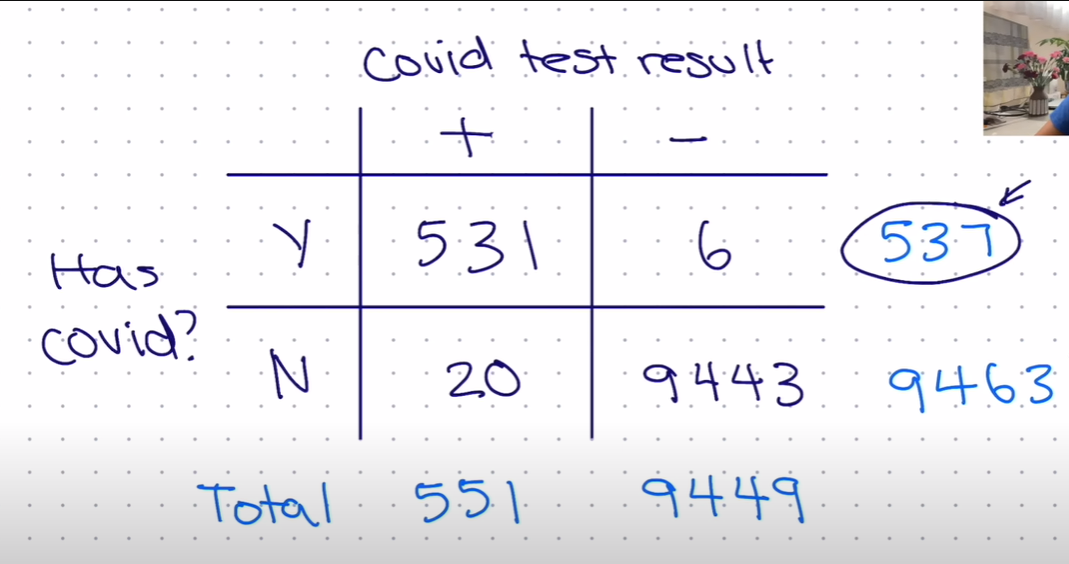

From the above diagram we cana see that,

"+ Y" means that the person has covid and was tested positive. Thus, this is true positive.

"- Y" means that the person has covid but was tested negative. Thus, this is false negative.

"+ N" means that the person doesn't have covid but was tested positive. Thus, this is false positive.

"- N" means that the person doesn't have covid and did tested negative. Thus, this is true negative.

From this, we can understand that there is a probability that you don't have covid and tested positive, this can be used to determine the accuracy of the covid test.

From this comes the Bayes rule that is used to determine the probability of a certain case to occur based on the probability of occurence of other independent parameters.

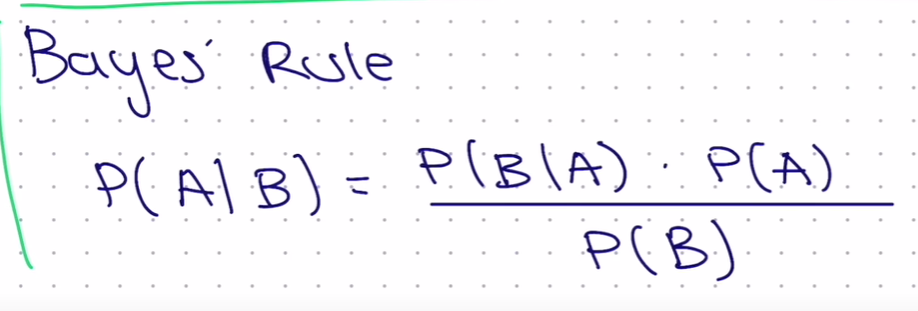

The above formula shows the probabilty of A to occur given that B has occurred. Thus, we can say that B is one of the parameters to determine the occurrence of A. When the same formula is applied to many different independent parameters we get the following formula.

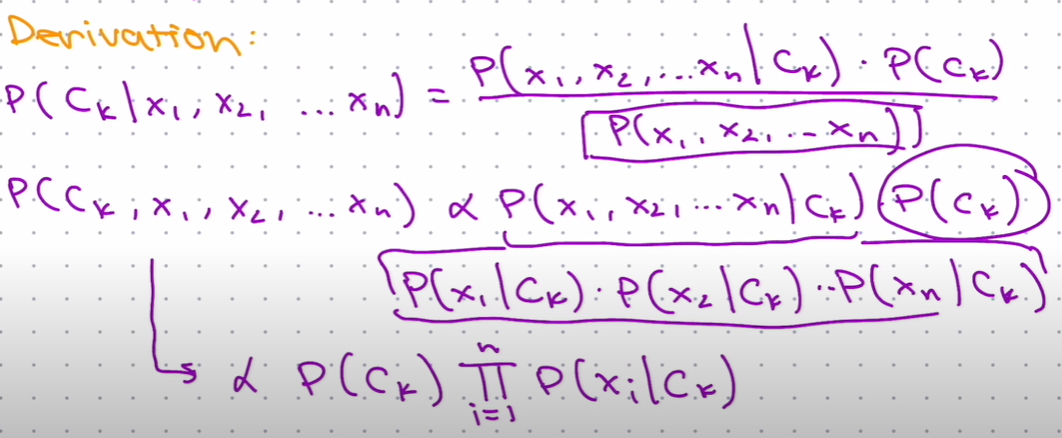

Using Bayer rule we get the formula Maximum A Posteriori which is used to predict the outcome from the dataset based on the differen independent parameters.

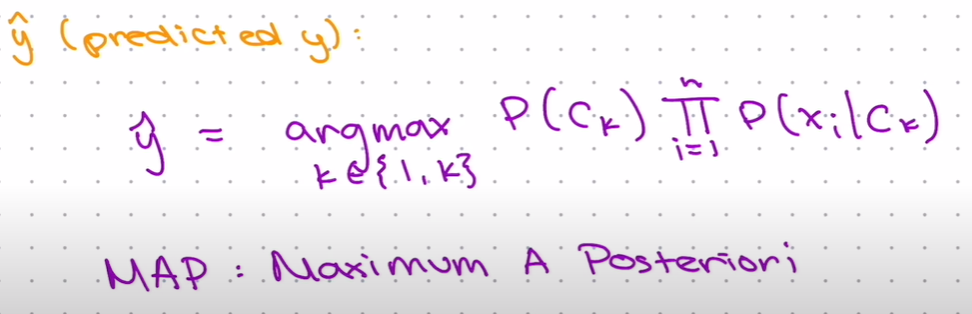

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [46]:
y_pred=nb_model.predict(test_x)
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.91      1.00      0.95        21
           2       1.00      0.83      0.91         6

    accuracy                           0.92        38
   macro avg       0.94      0.88      0.91        38
weighted avg       0.92      0.92      0.92        38



# Logistic Regression

We know that Machine Learning is used to either classify or predict. The process of prediction is called regression. When we try to classify with the help of regression, this type of regression is known as logistic regression. It is mainly used in case of binary classification problems. When there is only one parameter we call it simple logistic regression, while multiple parameters are called multiple logistic regression.

We know that in regression, we try to plot a line based on the existing data points such that this line is the best fit for all the data points. So in case of predicting between two values, we will get the following plot for the line.

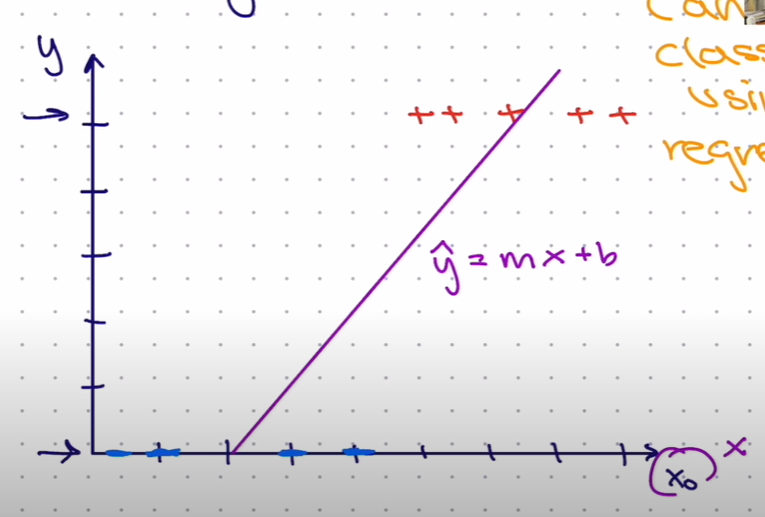

Thus, we can say that the formula for the prediction is a linear equation between the parameters. So we can re-write the equation in terms of the probability.

p = mx + b

In this the value of p can range from -ve infinity to +ve infinity, but the laws of probability state that probability can only lie between 0 and 1 so we must fix this in the following manner:

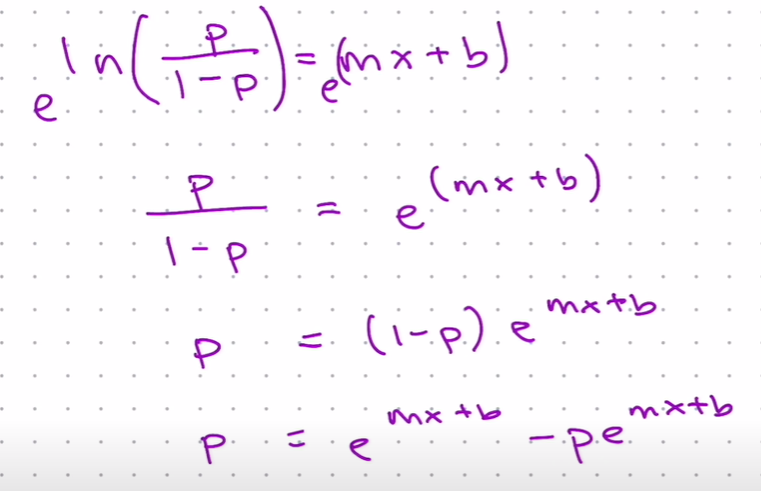

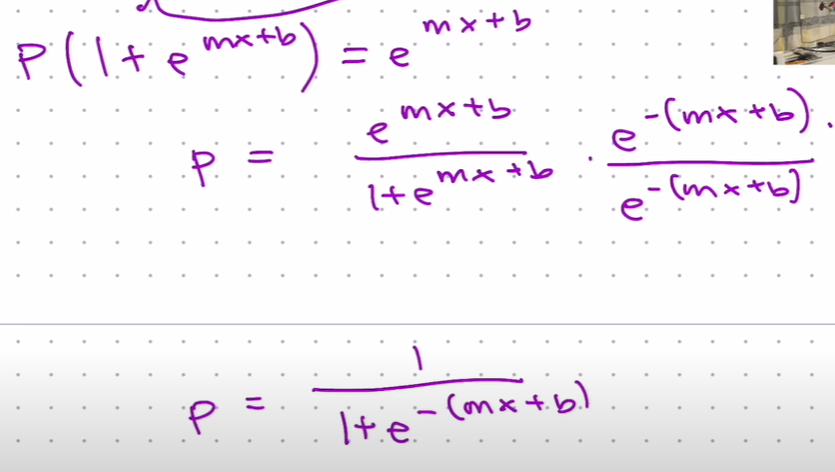

Thus, we can see that probability in this case will be in the range of 0 to 1. The graph of this equation is called the sigmoid function which looks as follows :

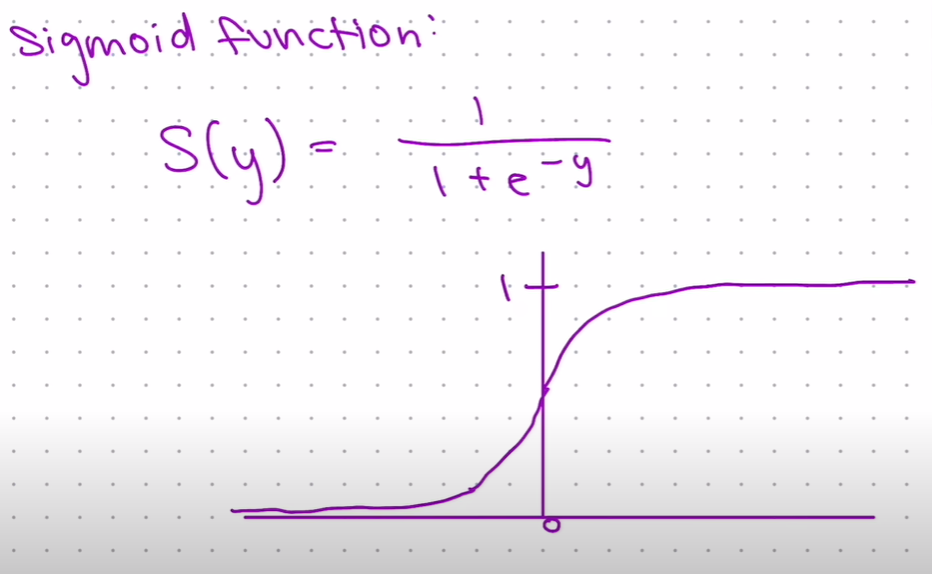

This plot seems to make a lot more sense when trying to predict the value in binary classifications. So we try to fit our data to the sigmoid function.

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr_model=LogisticRegression(max_iter=10000)   #max_iter is used to increase the maximum limit of the number of iterations possible.
lr_model=lr_model.fit(x_train,y_train)

In [49]:
y_pred=lr_model.predict(test_x)
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.91      1.00      0.95        21
           2       0.71      0.83      0.77         6

    accuracy                           0.87        38
   macro avg       0.83      0.82      0.82        38
weighted avg       0.87      0.87      0.86        38



# Support Vector Machines (SVM)

SVM is a popular ML model since it can be used fro regression as well as classification, but it is majorly used for classification. In this type of model we are trying to find the a line such that it is able to divide the data points such that it acts as a distinct boundary between two or more categories of data in n-dimensional planes (a.k.a. hyperplanes). This decision border must be such that it is not super close to one category than the other since that would lead to an anomalous result and it may or may not be linear. Thus, we make the margins with the help of the extreme points for each of the category of the data point. The vectors that are used to determine the margins are known as the support vectors. We find the distance between the support vectors and the border. The goal of the SVM algorithm is to maximize the distance between the support vectors and the border, thereby maximizing the margin.

We must keep in mind, that this method is effective only when there are no outliers whatsoever, since even one outlier could cause the border to be wrongly placed, which will lead to an incorrect result. This is because in case of an outlier, that point will be considered as the extreme point and therefore it will be treated as the support vector.

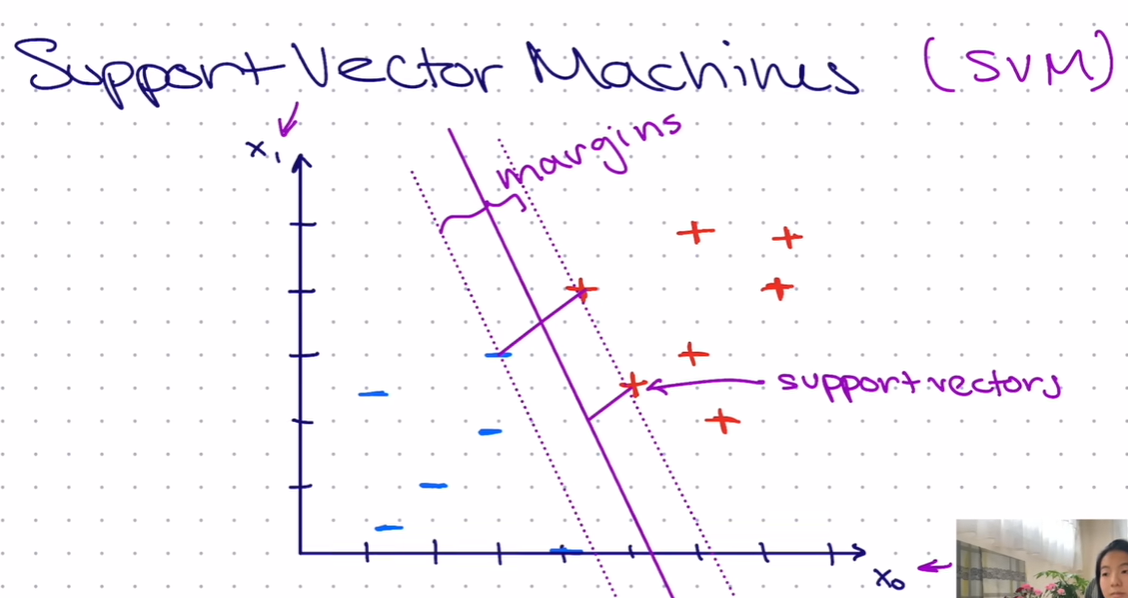

In case we aren't able to determine the SVM like in the case were all the different data points lie on the same line. We can modify the value of these data points by doing the same mathematical operation on all of them and making the plot of these data points as non-linear so as to be able determine where the SVM would lie. This mathematical adjustment that is made so as to be able to determine the decision border is known as the kernel trick. Like in the following example :

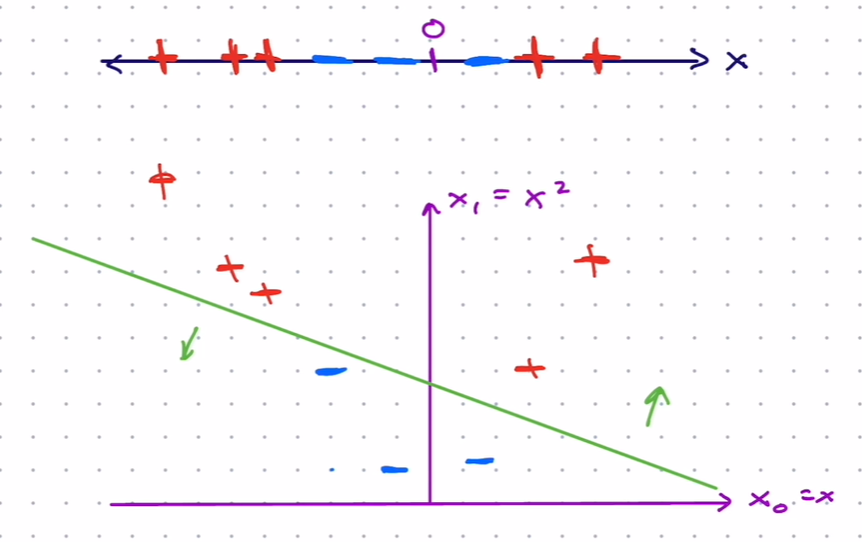

In [50]:
from sklearn.svm import SVC

In [51]:
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)

In [52]:
y_pred=svm_model.predict(test_x)
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.82      0.55        11
           1       0.85      0.52      0.65        21
           2       1.00      0.50      0.67         6

    accuracy                           0.61        38
   macro avg       0.75      0.61      0.62        38
weighted avg       0.74      0.61      0.62        38

